# Algoritmo De Simon
Raissa Camelo
## Introdução
O algoritmo de Simon é capaz de encontrar padrões em funções, baseando-se na periodicidade das mesmas. 

Um bom exemplo para entender melhor do que se trata a periodicidade de uma função é a função modulo n (resto da divisão por n).
Se tomarmos por exemplo n = 4, sabemos que existem 4 possíveis saidas (0,1,2,3), e sabemos que os resultados se repetem para diferentes valores de x, ou seja, se $f(x) = 0$, $f(x)+ 4 = 0$, para todo x inteiro. Essa própriedade se extende para todas as outras saídas de mod4, e podemos observar que o **"c"** da função, sua periodicidade, é 4.

Agora que entendemos o que é a periodicidade, podemos compreender melhor o que o algoritmo de Simon faz. O algoritmo de Simon encontra o valor de **c** para funções binárias, podendo assim extrair o padrão de periodicidade da função e até mesmo inferir o tipo de mapeamento da mesma.

Dada uma função $f:${0,1}$^n$ $\rightarrow$ {0,1}$^n$, qualquer (caixa preta) 
onde $f(x) = f(y)$ se e somente se $x = y \oplus c$. Em outras palavras, c é uma espécie de padrão repetitivo de f e encontrando c teremos a periodicidade da função (quanto temos que deslocar x para que $f(x) = f(y)$).

---
Um exemplo de mapeamento para c = 100:

$000 \oplus 100 = 100$  
$001 \oplus 100 = 101$  
$010 \oplus 100 = 110$        
$011 \oplus 100 = 111$    
$100 \oplus 100 = 000$   
$101 \oplus 100 = 001$   
$110 \oplus 100 = 010$  
$111 \oplus 100 = 011$

logo a função será: 

$f(000) = f(100)$  
$f(001) = f(101)$  
$f(010) = f(110)$  
$f(011) = f(111)$

---

Caso c seja $(0^n)$, a função tera um mapeamento de 1 pra 1.

Exemplo $c = 000:$

$000 \oplus 000 = 000$  
$001 \oplus 000 = 001$  
$010 \oplus 000 = 010$        
$011 \oplus 000 = 011$    
$100 \oplus 000 = 100$   
$101 \oplus 000 = 101$   
$110 \oplus 000 = 110$  
$111 \oplus 000 = 111$

Para qualquer outro valor de c, a função terá mapeamento 1 para 2.
Nota-se que para o algoritmo de Simon funcionar a função utilizada precisa necessariamente garantir a condição
$f(x) = f(y)$ se e somente se $x = y \oplus c$.

## Algoritmo Clássico
Para resolver este problema de maneira clássica deveremos encontrar o valor de f para varias entradas, vericando, a cada entrada se o mesmo valor já foi obtido anteriormente. Caso um valor anteriormente obtido seja encontrado novamente $f(x) = f(y)$, temos a promessa de que $x = y \oplus c$, logo podemos obter c na mesma equação aplicando a operação \oplus y nos dois lados:

- $x \oplus y = y \oplus c \oplus  y$

- $x \oplus y = c$

Usando este procedimento para avaliar as funções, iremos precisar analisar a metade das funções até encontrar algum $f(x) = f(y)$, dado que a função seja 2-para-um, caso a função seja 1-por-1 serão necessárias $\frac{2^n}{2}+1 = 2^{n-1}$ (A metade mais 1). Com um algoritmo quântico espera-se uma eficiência melhor, sendo o objetivo do algoritmo de Simon otimizar a abordagem classica descrita.



## Algoritmo Quântico
O algoritimo quantico consiste em repetir várias vezes as operações abaixo, até encontrarmos uma quantidade suficiente de equações para formar um sistema de equações.

Operação Matricial: $(H^{\otimes n} \otimes I) U_{f} H^{\otimes n} \otimes I)\rangle |0,0\rangle$

Estados:
Dado um operador desconhecido $U_{f}$ que segue os padrões descritos acima


1. 
$|\psi_0\rangle = |0,0\rangle$

O estado inicial consiste em n qbits iniciais setados no estado zero tensorial n quibits também inicializados no estado zero. Isso acontece pois nós precisamos aplicar a função $U_{f}$ sobre uma entrada (n bits) e obter a sua saída (também n  bits), logo precisamos de 2 x n bits quânticos.

2.
A seguir devemos aplicar a matriz de Hadamard afim de obter todas os possíveis estados da base  {0,1}$^n$ , obtendo a seguinte configuração:
$|\psi_1\rangle = \dfrac{\sum_{x\in(0,1)^n} |x,0\rangle}{\sqrt{2^n}}$

Ao realizar este passo os valores do n ultimos qbits são mantidos no estado {0}$^n$, uma vez que a operação de Hadamard não é aplicada nos mesmos. Esse passo é crucial para obtermos todas as entradas x e y para aplicar a função Uf. Os 'x' são gerados pela aplicação de Hadamard nos n primeiros qbits e os 'y' não sofrem alterações, sendo mantidos em ${0}$$^n$.

3.
Dada uma função arbitrária Uf, ao calcularmos os valores de $U_f$ para os qbits obtendo o seguinte estado:

$|\psi_2\rangle = \dfrac{\sum_{x\in(0,1)^n} |x,f(x)\rangle}{\sqrt{2^n}}$

Lembrando que a a função aplicada mantem o valor de x (n primeiros qbits) igual e modifica apenas o valor de y (n ultimos qbits), dada as formulas: $x = x$ e $y = y \oplus f(x)$. Como no algoritmo de Simon os n ultimos qbits não sofrem alteração, permanecendo todos no estado 0, ao aplicar a função $U_f$ os valores de y assumem diretamente os valores de $f(x)$, uma vez que: $y = y \oplus f(x)$ -> se y = ${0}$$^n$  -> $y = f(x)$.

4. 
Finalmente aplica-se a operação de Hadamard novamente, obtendo o seguinte estado:

$|\psi_3\rangle = \dfrac{  \sum_{x\in(0,1)^n}( \sum_{z\in(0,1)^n} (-1)^{\langle z,x \rangle}|z,f(x)\rangle   )}{2^n}$

Como temos a garantia de que $x = y \oplus c$, para qualquer x arbritário do somatório, temos que |z,f(x)$\rangle$ = |z,f($x \oplus c$)$\rangle$. Logo podemos, ao fixar o x e um z arbitrário no estado acima, escreve-lo da seguinte forma:

$\dfrac{(-1)^{\langle z,x \rangle} + (-1)^{\langle z,x \oplus c \rangle}}{2^n}$ 

Ao aplica a propriedade do ou exclusivo: $|a,b\oplus c \rangle = |a,b\rangle \oplus |a,c \rangle$, obtendo:

$\dfrac{(-1)^{\langle z,x \rangle} + (-1)^{\langle z,x \rangle \oplus \langle z,c \rangle}}{2^n}$ 

Aplicando a própriedade do ou exclusivo associada a potencias de mesma base: $(x)^{\langle a,b \rangle \oplus \langle c,d \rangle} = (x)^{\langle a,b \rangle}(x)^{\langle c,d \rangle}$, obtemos:

$\dfrac{(-1)^{\langle z,x \rangle} + (-1)^{\langle z,x \rangle}(-1)^{\langle z,c \rangle}}{2^n}$ .

Se $ \langle z,c\rangle = 1$, iremos obter $\dfrac{0}{2^n}$

Se $ \langle z,c\rangle = 0$, iremos obter $\dfrac{2}{2^n} = +- 1$

Desta forma, quando medirmos os n qubitsdo topo apenas iremos obter strings nas quais $ \langle z,c\rangle = 0$.

Após executar o algoritmo de simon algumas vezes, obteremos um sistema de equações com o qual podemos calcular a string 'c'.
Exemplo:
1. $\langle 0100,c \rangle = 0$
2. $\langle 1010,c \rangle = 0$
3. $\langle 0000,c \rangle = 0$
4. $\langle 1001,c \rangle = 0$

Resolvidos desta forma:

1. $\langle c^2 \rangle = 0$
2. $\langle c^1 \oplus c^3 \rangle = 0$
3. 
4. $\langle c^1 \oplus c^4 \rangle = 0$

Se $c^1$ for = 0, então $c^4, c^3 = 0$, logo temos que c = '0000'
Se $c^1$ for = 1, então $c^4, c^3 = 1$, logo temos que c = '1011'

Caso tenhamos certeza de que U_f não é uma função mapeada de 1 para 1 e que c != '0000', concluimos que c = '1011'.




## Simulação e Execução
A seguir iremos demonstrar a implementação do algoritmo de através do circuito quântico desenhado, usando as funções de visualização da biblioteca qiskit. Logo após a mostragem do circuito iremos simular o algoritmo em Python pelo qiskit.
A função escolhida para a aplicação do algoritmo será a seguinte função, com 2 bits por entrada:

$f(00) = 11$

$f(01) = 11$

$f(10) = 00$

$f(11) = 00$

Observando brevemente esta função percebemos a string c é = '01', dado que $x = y \oplus c$.
Implementado essa função no algoritmo quantico de simon temos:



In [2]:
#Setando o Ambiente
import qiskit as qkit
from qiskit.tools.visualization import circuit_drawer  #Usado para desenhar o circuito quântico
from qiskit.tools.visualization import plot_histogram  #Usado para desenhar um gráfico com o resultadp
import time
import Qconfig
qkit.register(Qconfig.APItoken, Qconfig.config['url'])


Aqui precisamos definir o tamanho dos registradores classicos e quânticos.
Os registradores clássicos são utilizados para registrar a medição final dos registradores quânticos. Os registradores quânticos por sua vez serão utilizados nas operações, para se obter o resultado desejado.

In [3]:
rq = qkit.QuantumRegister(size=4)
rc = qkit.ClassicalRegister(size=2)

A seguir devemos estanciar o circuito usando a função abaixo. Salvaremos nosso modelo na variavel *Simon* e chamaremos os operadores quânticos na variável. Para o algoritmo de Simon ultilizaremos os operadores de Hadamard e a função f. A função f é sempre passada como entrada do algoritmo, para esta simulação utilizaremos os operadoros x e x controlado para descrever Uf.


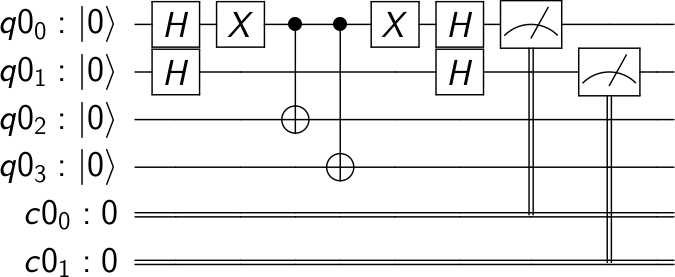

In [5]:
simon = qkit.QuantumCircuit(rq, rc)
#------------Aplicação do Hadamard nos n primeiros qbits
simon.h(rq[0])
simon.h(rq[1])
#-------------Aplicação da Função f---------------
simon.x(rq[0])
simon.cx(rq[0],rq[2])
simon.cx(rq[0],rq[3])
simon.x(rq[0])
#----------Aplicação do Hadamard novamente--------
simon.h(rq[0])
simon.h(rq[1])
#Medição dos n qbits e desenho do circuito
simon.measure(rq[0], rc[0])
simon.measure(rq[1],rc[1])
circuit_drawer(simon)

## Simulação do Processador Quantico

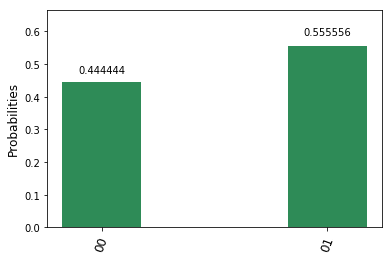

In [19]:
backend = "local_qasm_simulator"
shots = 9
job = qkit.execute(simon, backend=backend, shots=shots)
k = 0
wait_time = 1
while not job.done:
    print(job.status)
    print('waiting '+ str(k) + ' segundos' )
    k = k + wait_time
    time.sleep(wait_time)
    
results_sim = job.result() 
outputs_sim = results_sim.get_counts()

plot_histogram(outputs_sim)

## Executando no processador da IBM

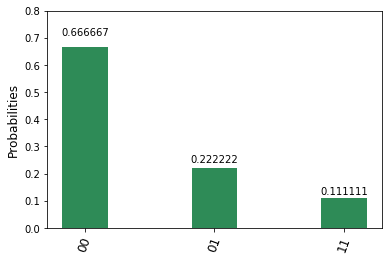

In [6]:
backend = "ibmq_16_melbourne"
#backend = "qasm_simulator"
shots = 9
job = qkit.execute(simon, backend=backend, shots=shots)
k = 0
wait_time = 10
print("Going")
"""
while not job.done:
    print(job.status)
    print('waiting '+ str(k) + ' segundos' )
    k = k + wait_time
    time.sleep(wait_time)
"""
results = job.result() 
outputs = results.get_counts()

plot_histogram(outputs)